In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv("../../Tascas/Data/DelayedFlights.csv")
df.dropna(inplace = True, subset = ["ArrDelay", "DepDelay","Distance", "AirTime"])

sns.set(rc={'figure.figsize': (15,10)})

/home/jesus/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


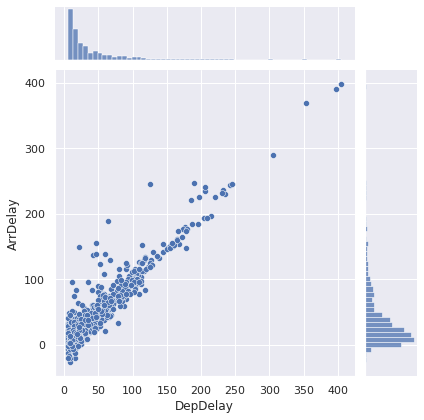

In [3]:
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac = 1).head(1000) # desordenamos y escojemos un numero limitado de datos
sns.jointplot(df2["DepDelay"],df2["ArrDelay"]) # nuves mas histogrmas de las variables

In [5]:
df3 = df2[np.abs(df2["DepDelay"])<40]  # absolutos que se hayan retrasado en la salida y llegada - 40
df3 = df3[np.abs(df3["ArrDelay"])<40]

/home/jesus/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


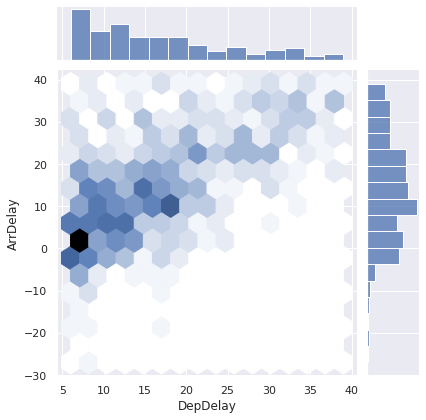

In [7]:
sns.jointplot(df3["DepDelay"],df3["ArrDelay"],kind="hex")

/home/jesus/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


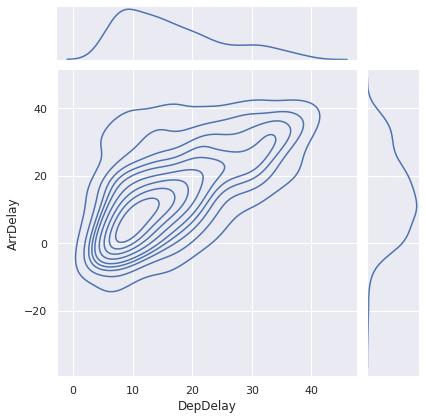

In [9]:
sns.jointplot(df3["DepDelay"],df3["ArrDelay"],kind="kde")

In [10]:
gb_df = pd.DataFrame(df2.groupby(["Origin","Month"], as_index=False)["DepDelay"].mean()) # mes y media retrasos
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,33.171429
1,ATL,2,48.436620
2,ATL,3,40.215909
3,ATL,4,27.609375
4,ATL,5,39.214286


In [11]:
data = gb_df.pivot("Month", "Origin","DepDelay") #transforma para grafica heatmap
data

Origin,ATL,HOU,IND
Month,,,
1,33.171429,43.333333,32.000000
2,48.436620,56.875000,61.833333
3,40.215909,26.555556,25.400000
4,27.609375,23.909091,32.125000
5,39.214286,26.000000,38.000000
6,32.253731,42.666667,26.888889
7,51.114583,37.000000,35.454545
8,40.571429,40.900000,40.200000
9,24.432432,43.000000,202.000000


<AxesSubplot:xlabel='Origin', ylabel='Month'>

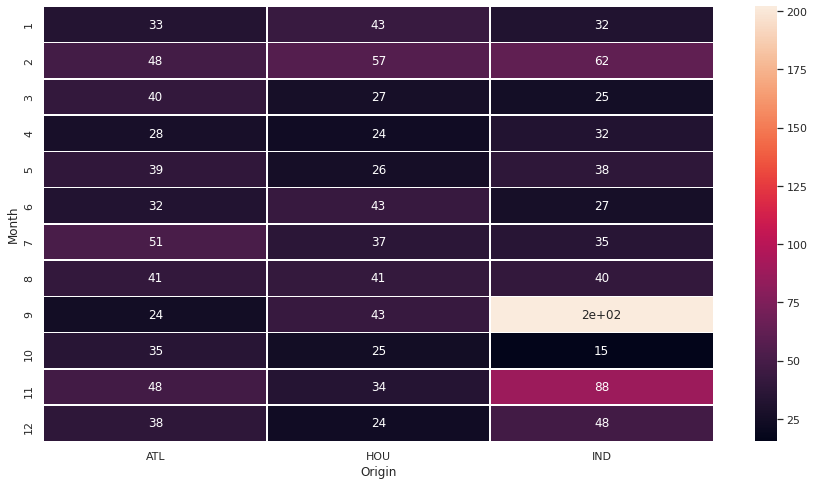

In [13]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data = data,annot=True, linewidths=.5)  #mes y aeropuerto retrasos mas elevados